<a href="https://colab.research.google.com/github/Sahgeek18/Data_Science/blob/main/Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path= "/content/Insurance_data.csv"
df= pd.read_csv(path)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#to check the columns
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#let's check how many null values we have
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
#categorical features:
# Sex
# Smoker
# Region

## data analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-13-7ec4bc8f949f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


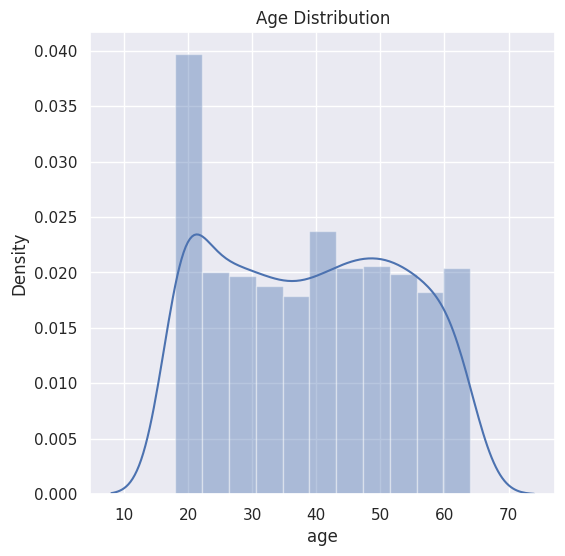

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

### to plot a categorical feature we need count plot

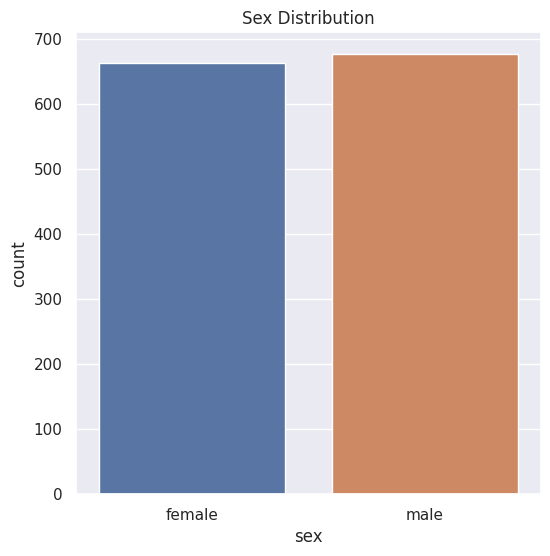

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'sex', data= df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['sex'].value_counts() #another way of getting this info

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<ipython-input-17-c6f5a094f930>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


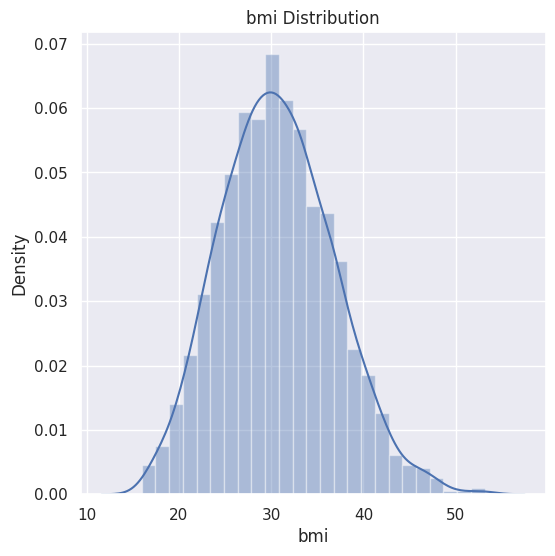

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

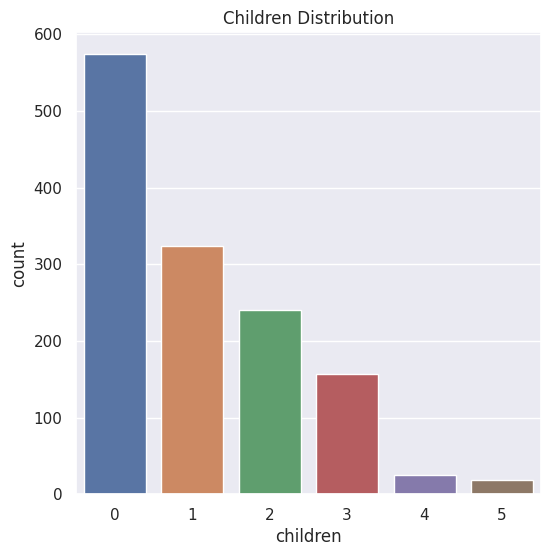

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'children', data= df)
plt.title('Children Distribution')
plt.show()

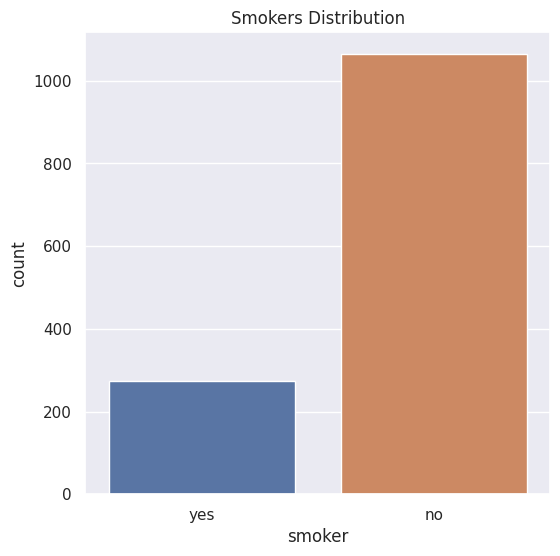

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'smoker', data= df)
plt.title('Smokers Distribution')
plt.show()

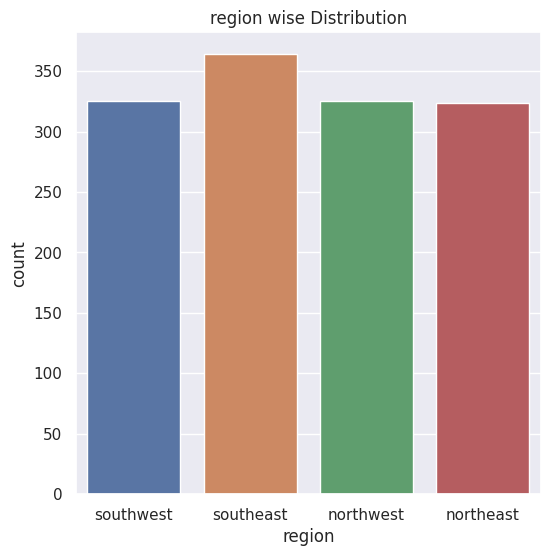

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'region', data= df)
plt.title('region wise Distribution')
plt.show()

<ipython-input-21-61c0943d68b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


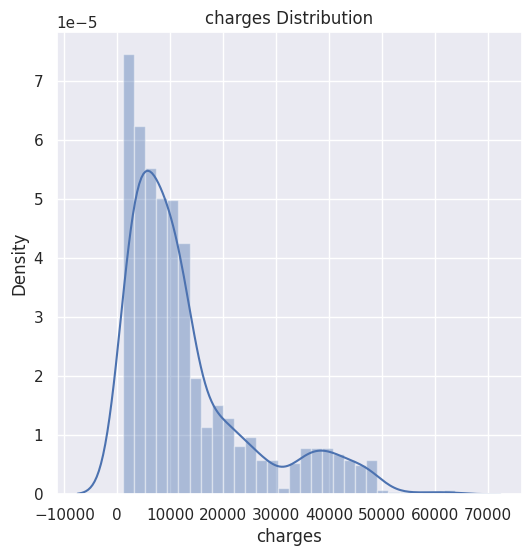

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

## data preprocessing

In [ ]:
#we will use encoding now to convert categorical values to numerical

In [ ]:
df.replace({'sex' : {'male':0, 'female':1}}, inplace =True)
df.replace({'smoker' : {'yes':0, 'no':1}}, inplace = True)
df.replace({'region' : {'southeast':0 , 'southwest':1, 'northeast': 2, 'northwest': 3}}, inplace= True)

In [ ]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960


In [ ]:
#now we will do the splitting features and targets

In [ ]:
x= df.drop(columns= 'charges', axis=1)
y=df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
#train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape, x.shape)

(1070, 6) (268, 6) (1338, 6)


In [ ]:
#model training

In [ ]:
regressor= LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#model evaluation

In [ ]:
#prediciton on training data

In [ ]:
training_data_predicition= regressor.predict(x_train)

In [ ]:
#performance metrics
from sklearn.metrics import r2_score

In [ ]:
r2_train= r2_score(y_train, training_data_predicition)

In [ ]:
print(' R Squared value:', r2_train)

 R Squared value: 0.751505643411174


In [ ]:
#prediction on test data

In [ ]:
test_data_predicition= regressor.predict(x_test)

In [ ]:
r2_test= r2_score(y_test, test_data_predicition)

In [ ]:
print('R Squared:', r2_test)

R Squared: 0.7447273869684076


### As R2 score for train and test data is nearly equal we can further proceed.

In [ ]:
# Building the predicitive system

In [ ]:
input_data= (33, 0 , 22.705, 0, 0, 3)

#changing input data to numpyarray
input_data_as_np= np.asarray(input_data)

input_data_reshaped= input_data_as_np.reshape(1,-1)

In [ ]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD', prediction[0])

[27798.03091551]
The insurance cost is USD 27798.0309155061


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
